In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


### **The main objective in here is to predict the median house price with multiple regression**

In [2]:
data = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Correlation Heatmap')

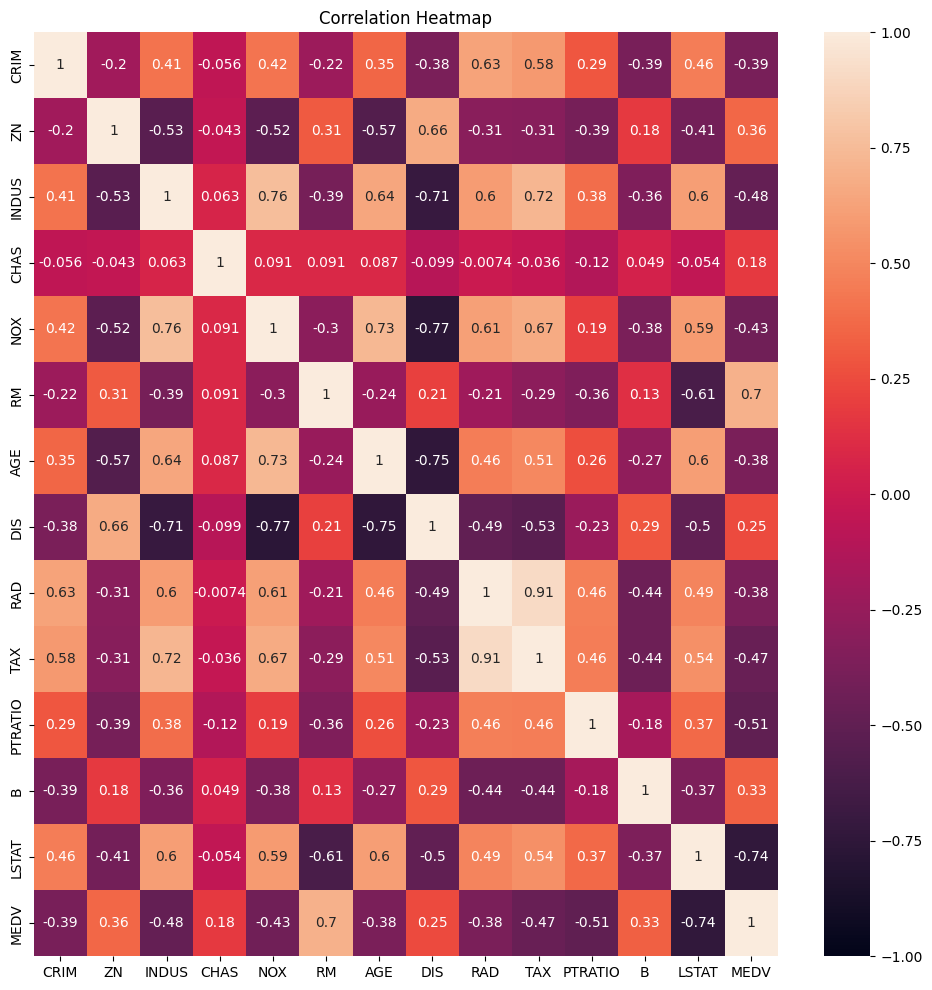

In [7]:
plt.figure(figsize = (12, 12))
heatmap = sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap')

# Regression with Sklearn

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f"MSE: {mse:.4f}")

MSE: 21.5174


In [11]:
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.4f}")

R-squared: 0.7112


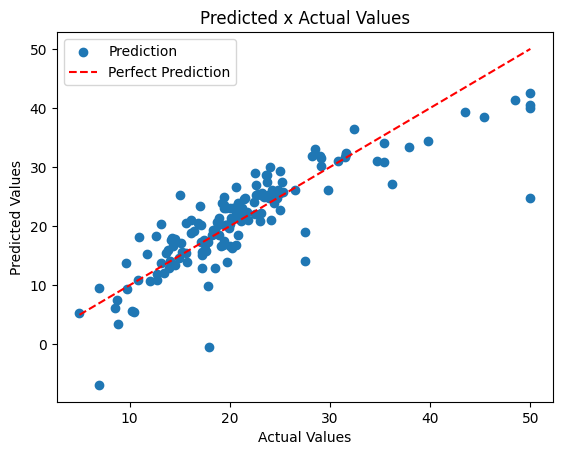

In [12]:
plt.scatter(y_test, predictions, label='Prediction')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted x Actual Values')
plt.legend()
plt.show()

In [13]:
final = pd.DataFrame({'Values': y_test.values,'Predictions': predictions})
final.head()

,Values,Predictions
0,23.6,28.648960
1,32.4,36.495014
2,13.6,15.411193
3,22.8,25.403213
4,16.1,18.855280


#### The predictions with Scikit shows increasing values everytime, an it makes sense if we are analysing house prices.

# Regression with Statsmodels

In [14]:
regression = sm.OLS(y, X).fit()
print(regression.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                        0.00
Time:                        18:49:05   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### The R Squared is close to 1, but the F-stat and AIC/BIC are too high, so maybe this model is not good for Statsmodels. We can also see in the coef column that the variables that have the most influence in the price predictions are the number of rooms (RM), Charles River Prediction (CHAS) and the Index of accessibility to radial highways (RAD).

In [15]:
residual = regression.resid
residual

0      -5.098264
1      -2.902275
2       3.472574
3       3.692896
4       6.635204
         ...    
501    -3.270701
502    -2.716942
503    -5.934355
504    -6.147705
505   -11.142319
Length: 506, dtype: float64

In [16]:
import scipy.stats as stats
estatistica, p = stats.shapiro(residual)
p

1.3768426465823974e-19

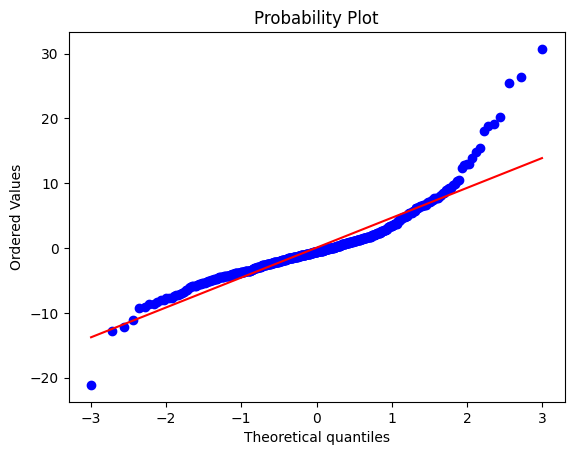

In [17]:
stats.probplot(residual, dist='norm', plot=plt)
plt.show()

#### As we can see, probably Statsmodels is not good for this kind of multiple regression, as the residual are too far from a normal distribution. We will now try to make a model with an intercept to see what happens.

In [18]:
regression2 = sm.OLS(y,sm.add_constant(X)).fit()
print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          6.72e-135
Time:                        18:49:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

#### The R Squared this time is not so close to 1, but the F-stat and AIC/BIC are lower. We can also see in the coef column that the variables that have the most influence in the price predictions are the same ones highlighted in the last model.

In [19]:
residual2 = regression2.resid
residual2

0      -6.003843
1      -3.425562
2       4.132403
3       4.792964
4       8.256476
         ...    
501    -1.133341
502    -1.775719
503    -3.727426
504    -4.127967
505   -10.444212
Length: 506, dtype: float64

In [20]:
estatistica, p = stats.shapiro(residual2)
p

1.480177833053824e-17

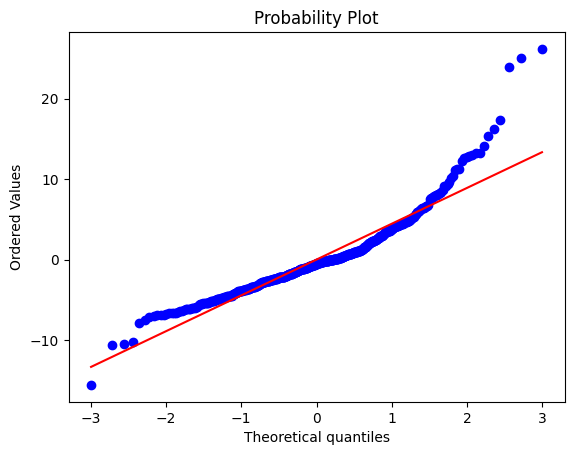

In [21]:
stats.probplot(residual2, dist='norm', plot=plt)
plt.show()

#### But now we can see that this model is not so good and too far from being a normal distribution as well. We will now try a normalized scale to see what happens.

In [22]:
from sklearn import preprocessing
df = data.copy()
d = preprocessing.normalize(df)
scaled_df = pd.DataFrame(d, columns=df.columns)
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000013,0.035955,0.004614,0.0,0.001075,0.013134,0.130238,0.008170,0.001998,0.591265,0.030562,0.792814,0.009948,0.047940
1,0.000058,0.000000,0.014961,0.0,0.000992,0.013588,0.166966,0.010511,0.004232,0.512112,0.037668,0.839907,0.019342,0.045709
2,0.000058,0.000000,0.015133,0.0,0.001004,0.015379,0.130778,0.010632,0.004281,0.517974,0.038099,0.840809,0.008626,0.074272
3,0.000071,0.000000,0.004772,0.0,0.001003,0.015319,0.100257,0.013270,0.006567,0.485964,0.040935,0.863856,0.006436,0.073114
4,0.000150,0.000000,0.004740,0.0,0.000996,0.015539,0.117842,0.013181,0.006523,0.482675,0.040658,0.862945,0.011589,0.078707


In [23]:
X_norm = scaled_df.drop('MEDV', axis=1)
y_norm = scaled_df['MEDV']

In [24]:
regression3 = sm.OLS(y_norm, X_norm).fit()
print(regression3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1324.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                        0.00
Time:                        18:49:07   Log-Likelihood:                          1734.9
No. Observations:                 506   AIC:                                     -3444.
Df Residuals:                     493   BIC:                                     -3389.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### This model is even worse than the intercept one. The variables of influence are mainly the same. Even with this model being the worst one, we will keep going with it to study more with Statsmodels, as well as to see how a bad model can perform with this predictions.

In [25]:
residual3 = regression3.resid
residual3

0     -0.010052
1     -0.006384
2      0.006307
3      0.007411
4      0.013105
         ...   
501   -0.005747
502   -0.003229
503   -0.010140
504   -0.010526
505   -0.019811
Length: 506, dtype: float64

In [26]:
estatistica, p = stats.shapiro(residual3)
p

7.455026812871736e-17

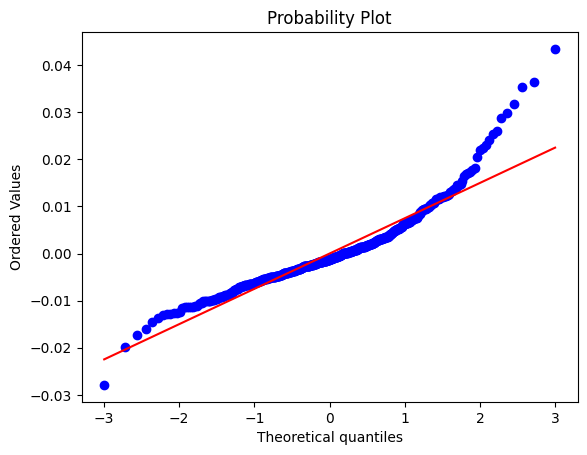

In [27]:
stats.probplot(residual3, dist='norm', plot=plt)
plt.show()

In [28]:
correlacoes = X_norm.corr(method='pearson')
correlacoes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.205217,0.245886,-0.063494,-0.080784,-0.493759,0.087648,-0.418596,0.614210,0.549562,-0.375030,-0.590271,0.251829
ZN,-0.205217,1.000000,-0.521216,-0.019292,-0.297702,0.385258,-0.481557,0.643707,-0.313493,-0.329060,0.030620,0.296792,-0.374552
INDUS,0.245886,-0.521216,1.000000,0.081398,0.415608,-0.449485,0.447608,-0.627394,0.282100,0.458148,-0.195065,-0.446802,0.480453
CHAS,-0.063494,-0.019292,0.081398,1.000000,0.146826,0.102897,0.114986,-0.052137,-0.039650,-0.075738,-0.017185,0.069623,-0.002320
NOX,-0.080784,-0.297702,0.415608,0.146826,1.000000,0.244445,0.600458,-0.260137,-0.210888,-0.117253,0.204856,0.038665,0.368345
RM,-0.493759,0.385258,-0.449485,0.102897,0.244445,1.000000,-0.040462,0.579425,-0.700785,-0.798786,0.585528,0.678439,-0.380897
AGE,0.087648,-0.481557,0.447608,0.114986,0.600458,-0.040462,1.000000,-0.493855,0.026088,0.081326,0.048708,-0.130955,0.497819
DIS,-0.418596,0.643707,-0.627394,-0.052137,-0.260137,0.579425,-0.493855,1.000000,-0.561682,-0.616830,0.488374,0.578298,-0.325394
RAD,0.614210,-0.313493,0.282100,-0.039650,-0.210888,-0.700785,0.026088,-0.561682,1.000000,0.802895,-0.579262,-0.812752,0.168457
TAX,0.549562,-0.329060,0.458148,-0.075738,-0.117253,-0.798786,0.081326,-0.616830,0.802895,1.000000,-0.649951,-0.939461,0.258608


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = add_constant(X_norm) 
pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

const      1772.170361
CRIM          1.761219
ZN            2.421415
INDUS         2.409242
CHAS          1.064850
NOX           2.473551
RM            5.839438
AGE           2.390096
DIS           4.207643
RAD           4.463762
TAX          19.007927
PTRATIO       2.806367
B            15.003754
LSTAT         2.276485
dtype: float64

In [30]:
scaled_df['predicted'] = regression3.fittedvalues
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,predicted
0,0.000013,0.035955,0.004614,0.0,0.001075,0.013134,0.130238,0.008170,0.001998,0.591265,0.030562,0.792814,0.009948,0.047940,0.057992
1,0.000058,0.000000,0.014961,0.0,0.000992,0.013588,0.166966,0.010511,0.004232,0.512112,0.037668,0.839907,0.019342,0.045709,0.052094
2,0.000058,0.000000,0.015133,0.0,0.001004,0.015379,0.130778,0.010632,0.004281,0.517974,0.038099,0.840809,0.008626,0.074272,0.067964
3,0.000071,0.000000,0.004772,0.0,0.001003,0.015319,0.100257,0.013270,0.006567,0.485964,0.040935,0.863856,0.006436,0.073114,0.065702
4,0.000150,0.000000,0.004740,0.0,0.000996,0.015539,0.117842,0.013181,0.006523,0.482675,0.040658,0.862945,0.011589,0.078707,0.065601


#### The predicted values are all over the place, some are higher and others are lower, and that is very different than the Scikit model. I didn't use the best scaling and normalization for the statsmodels part, so I would like to know if there are better options to do this model